<a href="https://colab.research.google.com/github/hansglick/book_errata/blob/main/hf_utilisation_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
import transformers

 * page : https://huggingface.co/course/fr/chapter2/2?fw=tf
 * video :  https://www.youtube.com/watch?v=1pedAIvTWXk&ab_channel=HuggingFace

## Intro rapide
 * Ce ne sont en fait que de simples classes Pytorch `nn.Module` ou bien Tensorflow `tf.keras.Model`
 * Ces classes ne souffrent d'aucune abstraction, toute l'implémentation est contenue dans un seul fichier de sorte que n'importe qui peut le parcourir et le comprendre facilement


## Qu'est-ce qu'un pipeline?

Grosso modo ça consiste en trois étapes :
 1. Tokenization, qui est fait via l'api `transformers.AutoTokenizer` et en particulier la fonction `from_pretrained()` qui met en cache le tokenizer du modèle renseigné : 
   * Division du texte en chunks, le plus souvent des mots mais pas que
   * Ajout des special tokens comme [START],[MASK],[CLS],[END]
   * Mapping des tokens vers des entiers

 2. Modelization, qui est fait via l'api `transformers.AutoModel` (pour pytorch) ou bien `transformers.TFAutoModel` (pour tensorflow) et en particulier la fonction `from_pretrained()` qui met en cache les poids et l'architecture du modèle renseigné :
   * `outputs = model(**inputs)`
   * `outputs` contient vraisemblablement tout les résultats de toutes les couches intermédiaires et finale **excepté la dernière tête** (adapté au transfert learning donc). I.E. tu as la phrase entière encodée. Pour avoir accès au résultat de la dernière couche : `outputs.last_hidden_state`. La shape du tensor de sortie est (`batch_size`,`sentence_length`,`embedding_size`)
   * Pour accéder à une représentation permettant la classification d'une séquence on utilise l'api `transformers.AutoModelForSequenceClassification`. Celle-ci permet la création d'une instance d'un modèle tout comme le précédent excepté qu'il contiendra une tête finale de classification. A ce moment là pour avoir les résultats faire `outputs.logits` pour visualiser les logits. Par défaut, il est retourné les logits et non les probabilités pour chacun des modèles.  
 3. Postprocessing : c'est ici que les logits sont convertis en probabilité. Apparemment c'est en appliquant un softmax dessus qu'on le fait, je me rappelais même plus
   * Pour accéder au dictionnaire des labels : `model.config.id2label`


### Schéma d'une pipeline

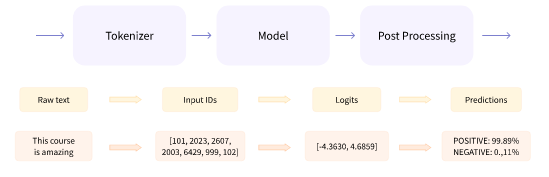

### Schéma Différence avec et sans tête de classification

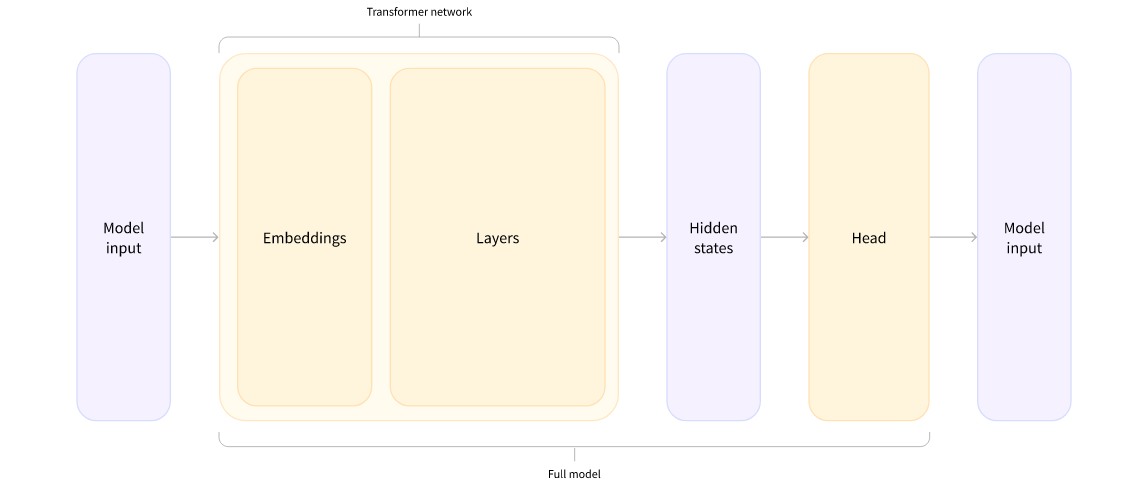
